<a href="https://colab.research.google.com/github/KieuSonTung/Data_Preparation/blob/main/Week_8_Predict_car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Car prive/train-data.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Car prive/test-data.csv')

train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


# Visualize the data

## Overall

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
train_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
# Remove all the rows which is null

# train_data = train_data[train_data['Mileage'].notna()]
# train_data = train_data[train_data['Engine'].notna()]
# train_data = train_data[train_data['Power'].notna()]
# train_data = train_data[train_data['Seats'].notna()]
train_data = train_data.drop(columns='Unnamed: 0')
train_data = train_data.drop(columns='New_Price')

train_data = train_data.dropna()

# Reset index
train_data = train_data.reset_index(drop=True)

train_data.shape

(5975, 12)

In [7]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [8]:
# Modify some fields 

train_data['new_mileage'] = train_data['Mileage'].apply(lambda x: float(x.split()[0]))
train_data['new_engine'] = train_data['Engine'].apply(lambda x: float(x.split()[0]))
train_data['brand'] = train_data['Name'].apply(lambda x: x.split()[0])

train_data['new_power'] = train_data['Power'].apply(lambda x: x.split()[0])
train_data = train_data[train_data['new_power'].str.contains('\d', regex=True)]
train_data['new_power'] = train_data['new_power'].apply(lambda x: float(x))

train_data = train_data.drop(columns=['Mileage', 'Engine', 'Power', 'Name'])

train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,new_mileage,new_engine,brand,new_power
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,Maruti,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,Hyundai,126.20
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,Honda,88.70
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,Maruti,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,Audi,140.80


In [9]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price,new_mileage,new_engine,new_power
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,5.283719,9.603919,18.277839,1625.745572,113.276894
std,3.164568,9.216941e+04,0.805081,11.249453,4.365657,601.641783,53.881892
min,1998.000000,1.710000e+02,2.000000,0.440000,0.000000,624.000000,34.200000
25%,2012.000000,3.342250e+04,5.000000,3.517500,15.260000,1198.000000,75.000000
50%,2014.000000,5.260900e+04,5.000000,5.750000,18.200000,1495.500000,97.700000
75%,2016.000000,7.240275e+04,5.000000,10.000000,21.100000,1991.000000,138.100000
max,2019.000000,6.500000e+06,10.000000,160.000000,33.540000,5998.000000,560.000000


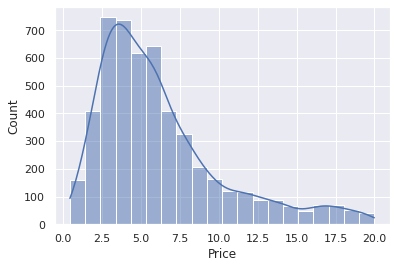

In [10]:
# Price histogram

fig, ax = plt.subplots()
ax = sns.histplot(data=train_data[train_data.Price < 20], x = 'Price', bins=20, kde=True)

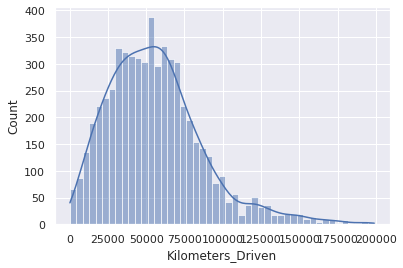

In [11]:
# Kilometers driven histogram

fig, ax = plt.subplots()
ax = sns.histplot(data=train_data[train_data['Kilometers_Driven'] < 0.2e6], x='Kilometers_Driven', kde=True)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


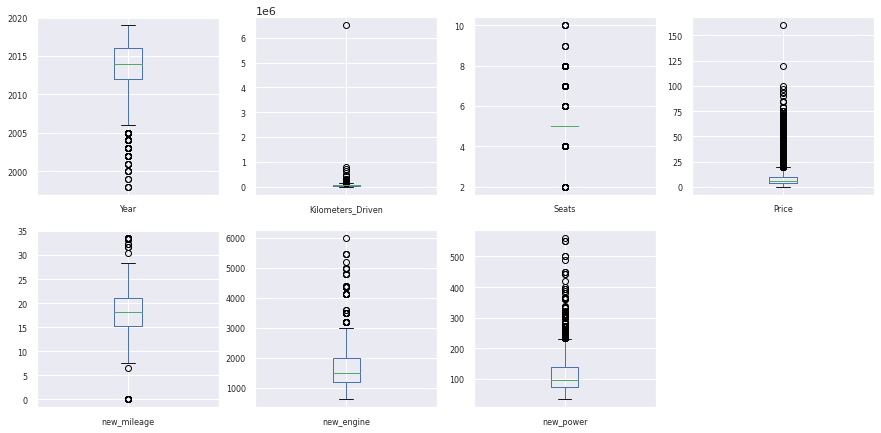

In [12]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
train_data.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, fontsize=8, ax=ax)
plt.show()

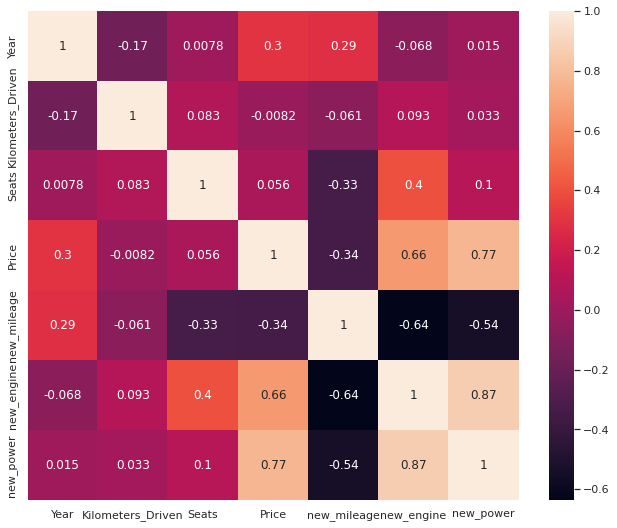

In [13]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(train_data.corr(), annot=True)

We can see that correlation between **new_engine** and **new_power** is  relatively high, so we will have to choose one of them. We can also see that **new_power** and **Price** is more correlated than **new_engine** and **Price**. So we will drop the **new_engine** column

In [14]:
train_data = train_data.drop(columns='new_engine')
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,new_mileage,brand,new_power
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,Maruti,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,Hyundai,126.20
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,Honda,88.70
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,Maruti,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,Audi,140.80


## Year

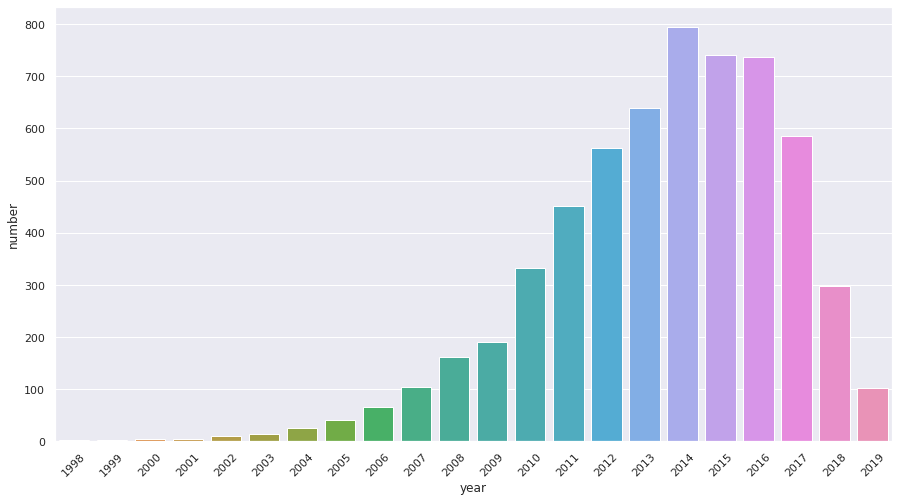

In [15]:
# Number of cars in each year

years = train_data['Year'].value_counts()
years = pd.DataFrame(years).reset_index().rename(columns={'index': 'year', 'Year': 'number'}).sort_values(by='year')
# years.head()

plt.figure(figsize = (15,8))
ax = sns.barplot(data=years, x='year', y='number')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

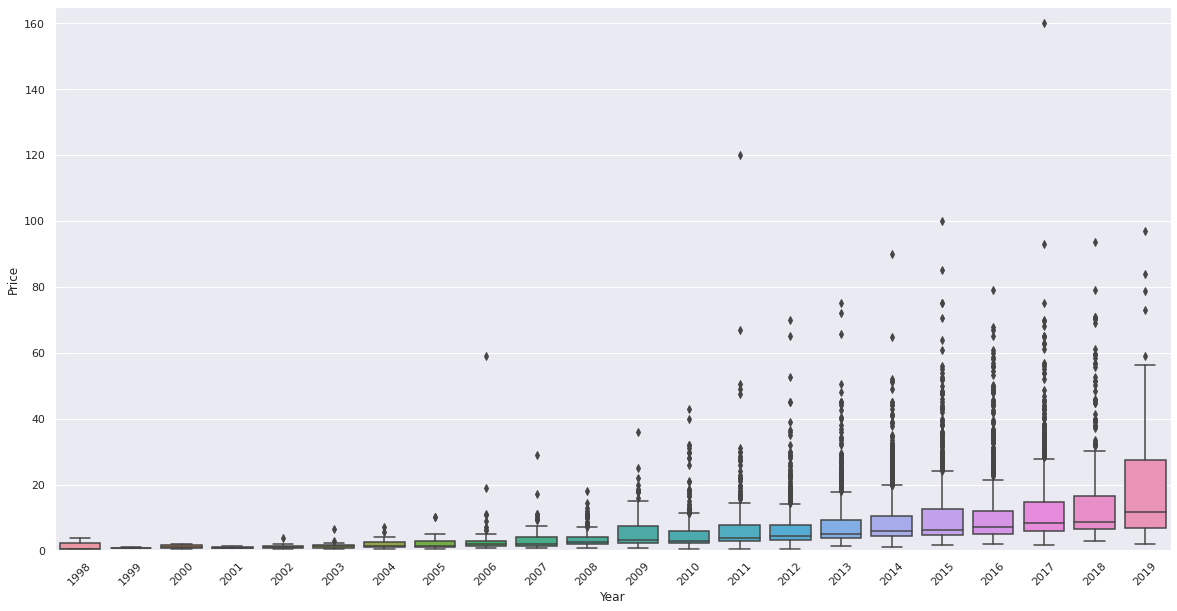

In [16]:
# Year/ Price

data = pd.concat([train_data['Year'], train_data['Price']], axis=1)

fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x='Year', y='Price', data=data)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
ax.axis(ymin=0, ymax=165)
plt.show()

## Brands

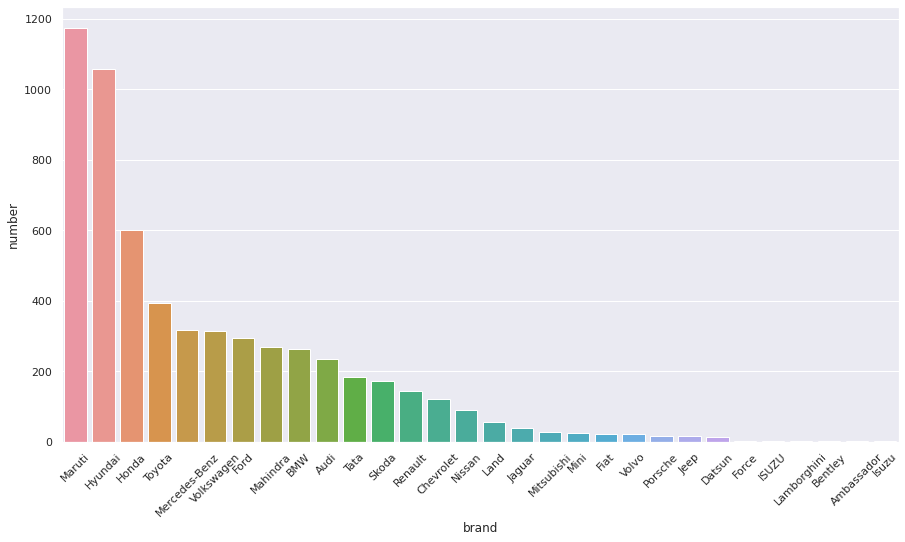

In [17]:
# Brands

brands = train_data['brand'].value_counts()
brands = pd.DataFrame(brands).reset_index().rename(columns={'index': 'brand', 'brand': 'number'})

plt.figure(figsize = (15,8))
ax = sns.barplot(data=brands, x='brand', y='number')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

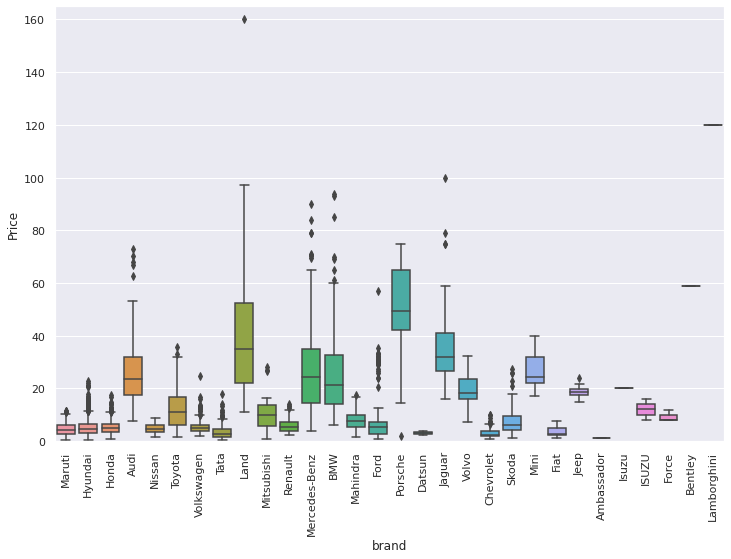

In [18]:
data = pd.concat([train_data['Price'], train_data['brand']], axis=1)

fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x='brand', y='Price', data=data)
ax.axis(ymin=0, ymax=165)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

Since there are a lot of variations so let's drop them

In [19]:
train_data.drop(columns='brand', inplace=True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,new_mileage,new_power
0,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,58.16
1,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,126.20
2,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,88.70
3,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,140.80


## Fuel type

In [20]:
train_data['Fuel_Type'].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

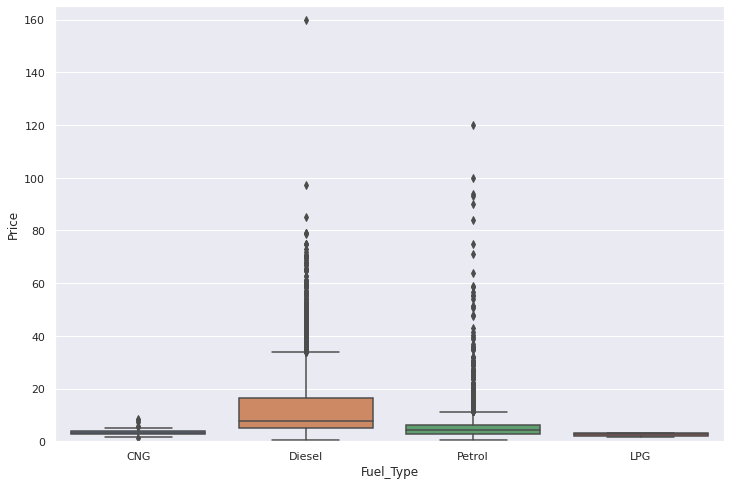

In [21]:
# Fuel type/ Price

data = pd.concat([train_data['Price'], train_data['Fuel_Type']], axis=1)

fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.boxplot(x='Fuel_Type', y='Price', data=data)
ax.axis(ymin=0, ymax=165)
plt.show()

In [22]:
Fuel_type = train_data[['Fuel_Type']]
Fuel_type = pd.get_dummies(Fuel_type,drop_first=True)
Fuel_type.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


## Owner type

In [23]:
train_data['Owner_Type'].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

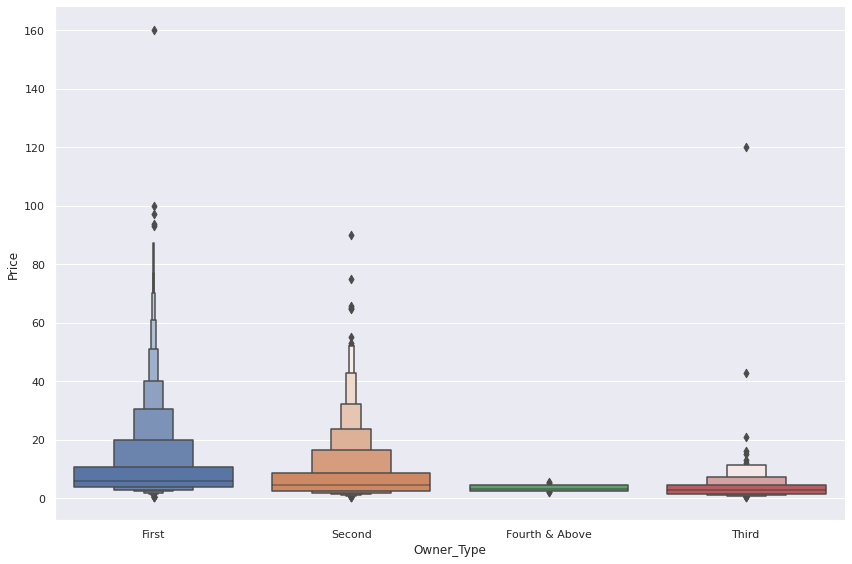

In [24]:
sns.catplot(x ='Owner_Type', y ='Price', data = train_data, kind='boxen', height=8, aspect=1.5) 
plt.show()

In [25]:
train_data.replace(to_replace={'First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4}, inplace=True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,new_mileage,new_power
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,26.60,58.16
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,126.20
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,88.70
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,140.80


## Location

In [26]:
train_data['Location'].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

In [27]:
Location = train_data[['Location']]
Location = pd.get_dummies(data=Location, drop_first=True)

Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


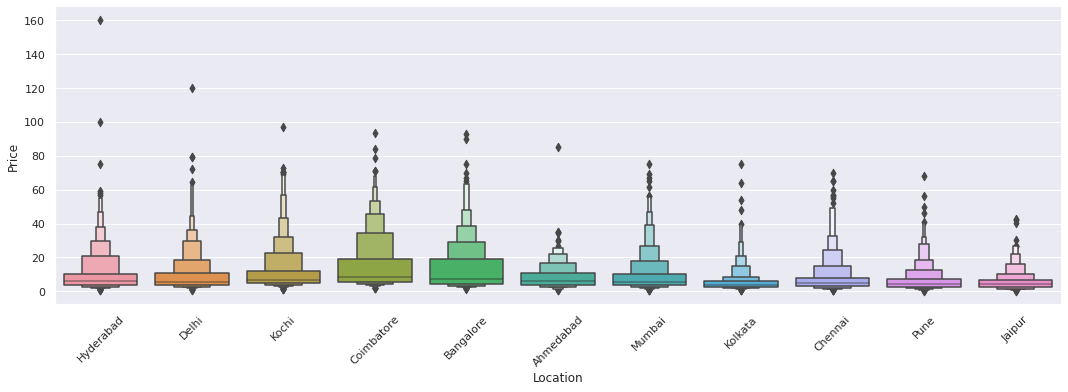

In [28]:
sns.catplot(x='Location', y='Price', data=train_data.sort_values(by='Price', ascending=False), kind='boxen', aspect=3)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

## Transmission

In [29]:
train_data['Transmission'].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

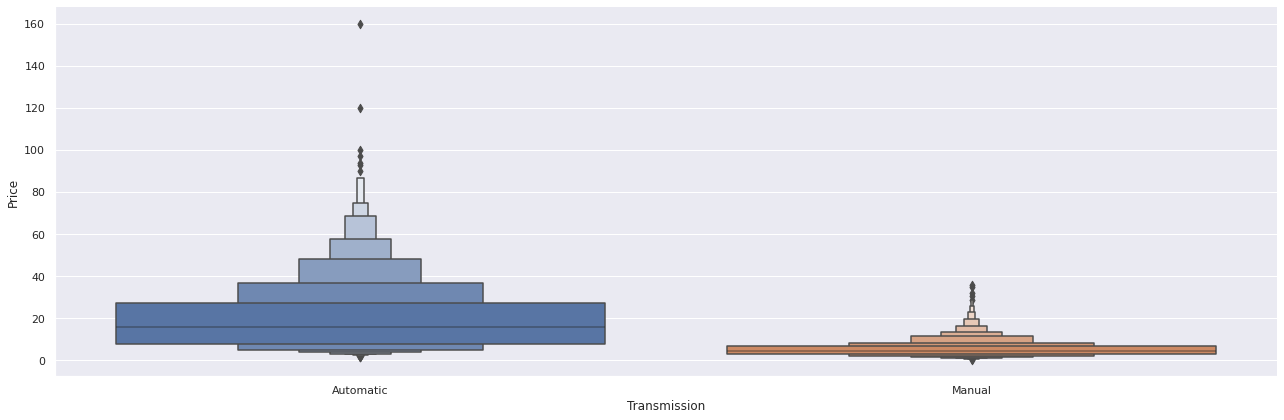

In [30]:
sns.catplot(y='Price', x='Transmission' , data=train_data.sort_values('Price', ascending=False), kind="boxen", height=6, aspect=3)
plt.show()

In [31]:
Transmission = train_data[['Transmission']]
Transmission = pd.get_dummies(data=Transmission, drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


## Final train data

In [32]:
final_train = pd.concat([train_data, Fuel_type, Transmission, Location], axis=1)
final_train.drop(columns=['Fuel_Type', 'Location', 'Transmission'], inplace=True)
final_train.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,new_mileage,new_power,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,2010,72000,1,5.0,1.75,26.60,58.16,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,2015,41000,1,5.0,12.50,19.67,126.20,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2011,46000,1,5.0,4.50,18.20,88.70,0,0,1,1,0,1,0,0,0,0,0,0,0,0
3,2012,87000,1,7.0,6.00,20.77,88.76,1,0,0,1,0,1,0,0,0,0,0,0,0,0
4,2013,40670,2,5.0,17.74,15.20,140.80,1,0,0,0,0,0,1,0,0,0,0,0,0,0


# Build model


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import svm


In [34]:
X = final_train.drop(columns='Price')
Y = final_train['Price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [ ]:
svr = svm.SVR()
param = {'kernel': ('linear', 'rbf'), 'C': [1, 10]}

reg = GridSearchCV(svr, param_grid=param)
reg.fit(x_train, y_train)
reg.cv_results_